In [ ]:
import numpy
from numpy import array
import sklearn
from sklearn import datasets
import matplotlib
from matplotlib import pyplot as plt

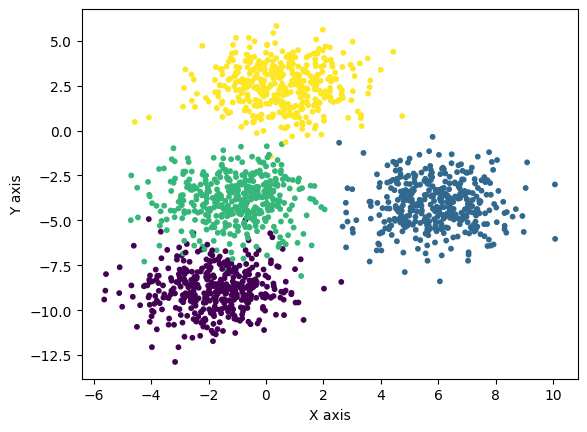

In [ ]:
X, labelOf = datasets.make_blobs(n_samples = 1600, centers = 4, n_features = 2, cluster_std = 1.3, random_state = 40)
K = numpy.amax(labelOf) + 1

def kmeans_display(X, labels):
    plt.scatter(X[:,0], X[:,1], s = 10, c = labels, cmap = 'viridis')
    plt.xlabel('X axis')
    plt.ylabel('Y axis')
    plt.show()
kmeans_display(X,labelOf)

In [ ]:
def kmeans_init_centers(X,K):
    return X[numpy.random.choice(X.shape[0], K, replace = False)]

def kmeans_assign_labels(X,centers):
    new_label = [None]*X.shape[0]

    for i in range(X.shape[0]):
        minDist = float('inf')
        for j in range(centers.shape[0]):
            Dist = numpy.linalg.norm(X[i] - centers[j])
            if (new_label[i] == None or Dist < minDist):
                    minDist = Dist
                    new_label[i] = j

    return new_label

def kmeans_update_centers(X,labels,K):
    centers = numpy.zeros((K,X.shape[1]),dtype = float)
    numPoint_in_cluster = [0]*K

    for i in range(X.shape[0]):
        idCluster = labels[i]
        centers[idCluster] += X[i]
        numPoint_in_cluster[idCluster] += 1

    for i in range(K):
        centers[i] = centers[i] / numPoint_in_cluster[i]

    return centers

def has_convered(old_centers,new_centers):
    return set([tuple(x) for x in old_centers]) == set([tuple(x) for x in new_centers])

In [ ]:
def KMeans(X,K):
    centers = kmeans_init_centers(X,K)
    labels = []

    it = 0
    while True:
        labels = kmeans_assign_labels(X,centers)
        new_centers = kmeans_update_centers(X,labels,K)
        if (has_convered(centers,new_centers)):
            break
        centers = new_centers
        it += 1

    return (centers,labels,it)

(centers, labels, it) = KMeans(X,K)

Centers found by algorithm : 
 [[ 5.89435462 -4.14708331]
 [-1.80970092 -8.84323446]
 [ 0.5282001   2.46237342]
 [-1.04059773 -3.80093392]]


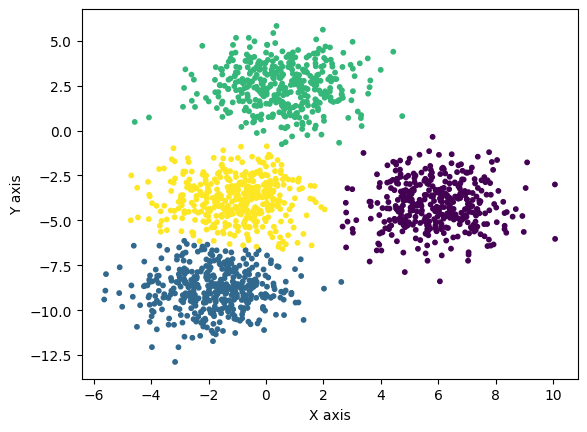

In [ ]:
labels = numpy.array(labels)
print('Centers found by algorithm : \n {}'.format(centers))
kmeans_display(X,labels)

Centers found by Sklearn Model : 
 [[-1.80607004 -8.83738815]
 [ 0.5282001   2.46237342]
 [ 5.89435462 -4.14708331]
 [-1.04240095 -3.79415821]]


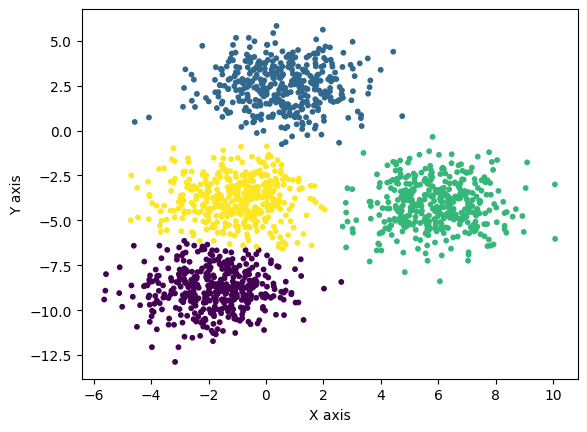

In [13]:
# build model by using Sklearn library
skl_model = sklearn.cluster.KMeans(n_clusters = 4, random_state = 0)
skl_model.fit(X)
print('Centers found by Sklearn Model : \n {}'.format(skl_model.cluster_centers_))
labeled_by_skl_model = skl_model.labels_
kmeans_display(X,labeled_by_skl_model)

In [14]:
from sklearn.metrics import homogeneity_score
rate_sklmodel = homogeneity_score(labelOf ,labeled_by_skl_model)*100
rate_algorithm = homogeneity_score(labelOf ,labels)*100

print(f"Homogeneity Score by skl_model : {rate_sklmodel}")
print(f"Homogeneity Score by algorith_model : {rate_algorithm}")

Homogeneity Score by skl_model : 94.54801449382622
Homogeneity Score by algorith_model : 94.54801449382622
